# Predict Customer Churn

- author: vuestro_nombre
- date: 27.10.2021
- version: v1.0

## What  is Churn Rate

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.

The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example in businesses with a subscriber-based service model such as mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks. **Churn rate is an input into customer lifetime value modeling**, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.

## CVL and Data Science

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

To select the most appropiate method, **other aspects from accuracy**, which is the most common parameter, can and should be considered as form example: robustness, speed, interpretability, and ease of use. In this practice we propose a methodology for evaluating statisticl models for classification with the use of a composite indicator. This one measures multidimensional concepts which cannot be captured by a single parameter and help decision makers to solve this complex problem.

We test our proposal on a set of five churn classification models drawn from a real experience, three of the, being based on individual classifiers(**logistic regression, decision tree, neural networks**), and other two constructed by using combined classifiers (**AdaBoost and Random Forest**).

We will consider four different alternatives to add another values as input variables selection that will be influence on the performance of the churn prediction model: original variables, aggregate variables, PCA (Principal Component Analysis), and stacking procedure.



## Main goal

The goal of the exercise is:
- Determine and present in an intuitive way the churn ratio at the time the data was taken and identify which factors are the main contributors to customer abandonment 
- Create a prediction model to determine if a customer is going to churn or not and a model that determines the probability that a customer will churn. 
- Illustrate the performance and business interest use of your model with the tools you deem appropriate.


### Business understanding

But how to start working with churn rate prediction? Which data is needed? And what are the steps to implementation?

As with any machine learning task, data science specialists first need data to work with. Depending on the goal, researchers define what data they must collect. Next, selected data is prepared, preprocessed, and transformed in a form suitable for building machine learning models. Finding the right methods to training machines, fine-tuning the models, and selecting the best performers is another significant part of the work. Once a model that makes predictions with the highest accuracy is chosen, it can be put into production.

The overall scope of work data scientists carry out to build ML-powered systems capable to forecast customer attrition may look like the following:

- Understanding a problem and final goal
- Data collection
- Data preparation and preprocessing
- Modeling and testing
- Model deployment and monitoring

### Understanding a problem and a final goal

It’s important to understand what insights one needs to get from the analysis. In short, we must decide what question to ask and consequently what type of machine learning problem to solve: classification or regression.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Model Pipeline

Companies that constantly monitor how people engage with products, encourage clients to share opinions, and solve their issues promptly have greater opportunities to maintain mutually beneficial client relationships.

And now imagine a company that has been gathering customer data for a while, so it can use it to identify behavior patterns of potential churners, segment these at-risk customers, and take appropriate actions to gain back their trust. Those following a proactive approach to customer churn management use predictive analytics. That’s one of four analytics types that entails forecasting the probability of future outcomes, events, or values by analyzing current and historical data. Predictive analytics utilizes various statistical techniques, such as data mining (pattern recognition) and machine learning (ML).

The prediction process is heavily data-driven and often utilizes advanced machine learning techniques. In this post, we'll take a look at what types of customer data are typically used, do some preliminary analysis of the data, and generate churn prediction models — all with Spark and its machine learning frameworks.

In [112]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Preprocessing
from sklearn.preprocessing import StandardScaler, normalize

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga de los datos
# Solo para Google colab para subir el fichero de datos
from google.colab import files
files.upload()

Saving client_dataset.csv to client_dataset.csv


{'client_dataset.csv': b'idClient;Score;CountryLocation;Gender;Age;Tenure;Games Balance;NumOfProducts;HasPremiumAccess;IsActiveMember;Cumulative score;Churn\r\n1;619;France;Female;42;2;0;1;1;1;101348.88;1\r\n2;608;Spain;Female;41;1;83807.86;1;0;1;112542.58;0\r\n3;502;France;Female;42;8;159660.8;3;1;0;113931.57;1\r\n4;699;France;Female;39;1;0;2;0;0;93826.63;0\r\n5;850;Spain;Female;43;2;125510.82;1;1;1;79084.1;0\r\n6;645;Spain;Male;44;8;113755.78;2;1;0;149756.71;1\r\n7;822;France;Male;50;7;0;2;1;1;10062.8;0\r\n8;376;Germany;Female;29;4;115046.74;4;1;0;119346.88;1\r\n9;501;France;Male;44;4;142051.07;2;0;1;74940.5;0\r\n10;684;France;Male;27;2;134603.88;1;1;1;71725.73;0\r\n11;528;France;Male;31;6;102016.72;2;0;0;80181.12;0\r\n12;497;Spain;Male;24;3;0;2;1;0;76390.01;0\r\n13;476;France;Female;34;10;0;2;1;0;26260.98;0\r\n14;549;France;Female;25;5;0;2;0;0;190857.79;0\r\n15;635;Spain;Female;35;7;0;2;1;1;65951.65;0\r\n16;616;Germany;Male;45;3;143129.41;2;0;1;64327.26;0\r\n17;653;Germany;Male;58;1

In [3]:
# Podemos investigar la cabecera del dataset con head -n en lenguaje bash
!head -n 5 /content/client_dataset.csv

idClient;Score;CountryLocation;Gender;Age;Tenure;Games Balance;NumOfProducts;HasPremiumAccess;IsActiveMember;Cumulative score;Churn
1;619;France;Female;42;2;0;1;1;1;101348.88;1
2;608;Spain;Female;41;1;83807.86;1;0;1;112542.58;0
3;502;France;Female;42;8;159660.8;3;1;0;113931.57;1
4;699;France;Female;39;1;0;2;0;0;93826.63;0


In [4]:
# Completar la carga de los datos
df = pd.read_csv('/content/client_dataset.csv', sep=";")
df.head(10)

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.__dir__()

['Age',
 'Churn',
 'CountryLocation',
 'Gender',
 'HasPremiumAccess',
 'IsActiveMember',
 'NumOfProducts',
 'Score',
 'T',
 'Tenure',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 

***
## Data Description

> Vamos a realizar la fase de prepación de los datos

In [6]:
# Configuramos el index por el idClient
df.set_index("idClient", inplace=True)
df

,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
idClient,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             10000 non-null  int64  
 1   CountryLocation   10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   Tenure            10000 non-null  int64  
 5   Games Balance     10000 non-null  float64
 6   NumOfProducts     10000 non-null  int64  
 7   HasPremiumAccess  10000 non-null  int64  
 8   IsActiveMember    10000 non-null  int64  
 9   Cumulative score  10000 non-null  float64
 10  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [8]:
df.dtypes

Score                 int64
CountryLocation      object
Gender               object
Age                   int64
Tenure                int64
Games Balance       float64
NumOfProducts         int64
HasPremiumAccess      int64
IsActiveMember        int64
Cumulative score    float64
Churn                 int64
dtype: object

In [9]:
df.describe()

,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Check unique values 
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 Score                460
CountryLocation        3
Gender                 2
Age                   70
Tenure                11
Games Balance       6382
NumOfProducts          4
HasPremiumAccess       2
IsActiveMember         2
Cumulative score    9999
Churn                  2
dtype: int64


In [11]:
# Check dataframe basic info
print("Dataset has {0} Rows".format(df.shape[0]))
print("Dataset has {0} Cols".format(df.shape[1]))

Dataset has 10000 Rows
Dataset has 11 Cols


## EDA, Visualization and Transformation data

In [12]:
# Check null and NA values for both dataset
print(df.isna().sum())

Score               0
CountryLocation     0
Gender              0
Age                 0
Tenure              0
Games Balance       0
NumOfProducts       0
HasPremiumAccess    0
IsActiveMember      0
Cumulative score    0
Churn               0
dtype: int64


In [13]:
# Check null and null values for both dataset
print(df.isnull().sum())

Score               0
CountryLocation     0
Gender              0
Age                 0
Tenure              0
Games Balance       0
NumOfProducts       0
HasPremiumAccess    0
IsActiveMember      0
Cumulative score    0
Churn               0
dtype: int64


In [14]:
# Check basic stats
print(df['Score'].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Score, dtype: float64


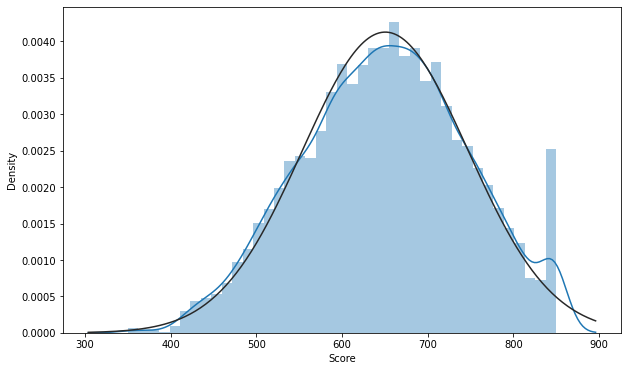

In [15]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(df['Score'], fit=norm)

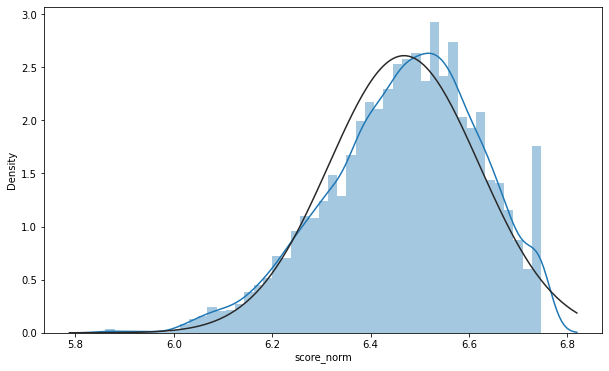

In [16]:
# Normalize the data
plt.figure(figsize= [10.0, 6.0])
df['score_norm'] = np.log1p(df['Score'])
sns.distplot(df['score_norm'], fit=norm)

In [17]:
# Evaluate Score and Churn as absolute values
pd.crosstab(df['Score'], df['Churn'])

Churn,0,1
Score,,
350,0,5
351,0,1
358,0,1
359,0,1
363,0,1
...,...,...
846,3,2
847,4,2
848,5,0


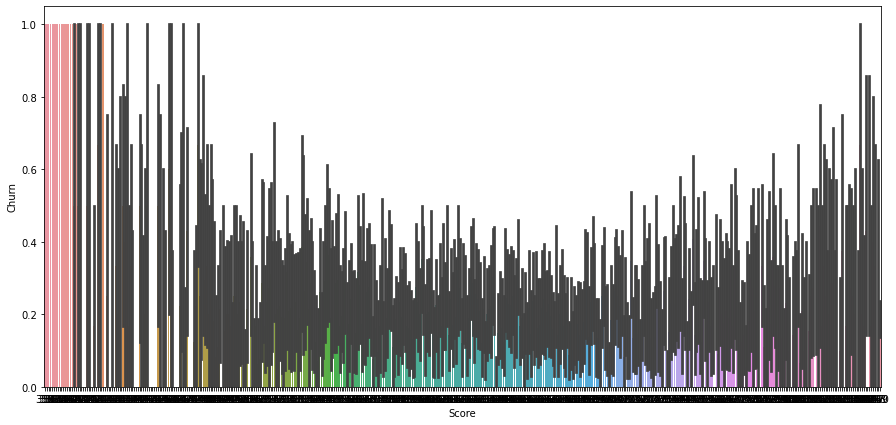

In [18]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="Score", y="Churn", data=df)

In [19]:
# Realizamos la discretización del atributo Score con pd.cut y bins / labels a medida
bins = [0, 300, 500, 700, 900, np.inf]
labels = ['Muy_bajo', 'Bajo', 'Medio', 'Medio_alto', 'Alto']
for score in df:
    df['ScoreGroup'] = pd.cut(df["Score"], bins=bins, labels=labels)

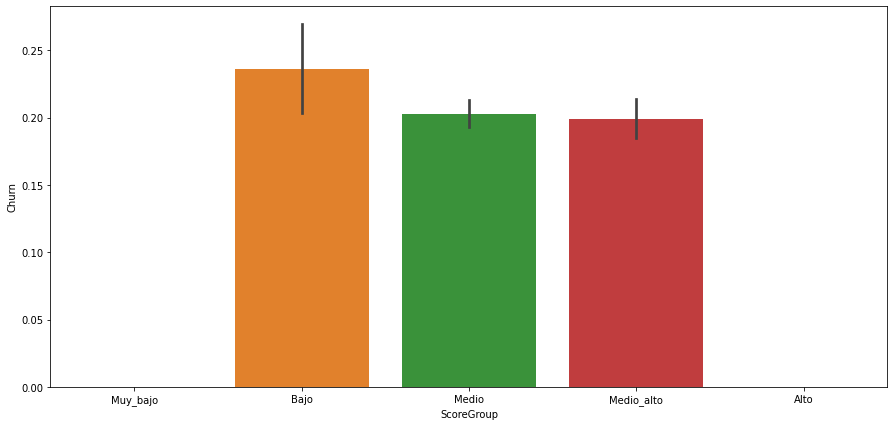

In [20]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="ScoreGroup", y="Churn", data=df)

In [21]:
# Alternativa con cuantiles con qcut cortamos en rangos de 4 o 5...
pd.qcut(df['Score'], q=5)

idClient
1          (566.0, 627.0]
2          (566.0, 627.0]
3        (349.999, 566.0]
4          (678.0, 735.0]
5          (735.0, 850.0]
               ...       
9996       (735.0, 850.0]
9997     (349.999, 566.0]
9998       (678.0, 735.0]
9999       (735.0, 850.0]
10000      (735.0, 850.0]
Name: Score, Length: 10000, dtype: category
Categories (5, interval[float64]): [(349.999, 566.0] < (566.0, 627.0] < (627.0, 678.0] < (678.0, 735.0] <
                                    (735.0, 850.0]]

In [22]:
df['ScoreGroup_2'] = pd.cut(df['Score'], 5, labels=['BRONCE','SILVER','GOLD','PLATINUM','DIAMOND'])

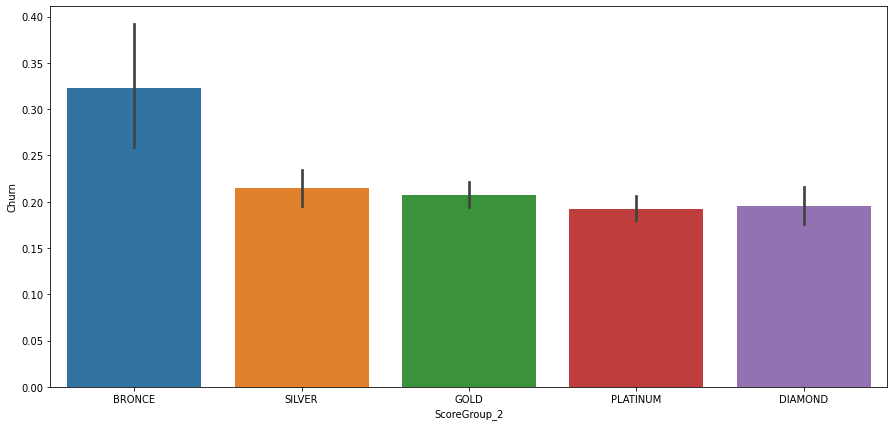

In [23]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="ScoreGroup_2", y="Churn", data=df)

In [24]:
pd.crosstab(df['ScoreGroup'], df['Churn'])

Churn,0,1
ScoreGroup,,
Bajo,491,152
Medio,4975,1266
Medio_alto,2497,619


In [25]:
pd.crosstab(df['ScoreGroup'], df.HasPremiumAccess)

HasPremiumAccess,0,1
ScoreGroup,,
Bajo,176,467
Medio,1851,4390
Medio_alto,918,2198


In [26]:
pd.crosstab(df['ScoreGroup'], df.IsActiveMember)

IsActiveMember,0,1
ScoreGroup,,
Bajo,342,301
Medio,3028,3213
Medio_alto,1479,1637


In [27]:
pd.crosstab(df['ScoreGroup'], df['Gender'])

Gender,Female,Male
ScoreGroup,,
Bajo,300,343
Medio,2828,3413
Medio_alto,1415,1701


In [28]:
pd.crosstab(index=df["ScoreGroup"],
                        columns=df["CountryLocation"], margins=True)

CountryLocation,France,Germany,Spain,All
ScoreGroup,,,,
Bajo,331,174,138,643
Medio,3132,1532,1577,6241
Medio_alto,1551,803,762,3116
All,5014,2509,2477,10000


In [29]:
pd.crosstab(index=df["ScoreGroup"],
                        columns=df["Churn"], margins=True)

Churn,0,1,All
ScoreGroup,,,
Bajo,491,152,643
Medio,4975,1266,6241
Medio_alto,2497,619,3116
All,7963,2037,10000


In [30]:
pd.crosstab(index=df["ScoreGroup"],
                        columns=df["NumOfProducts"], margins=True)

NumOfProducts,1,2,3,4,All
ScoreGroup,,,,,
Bajo,335,288,15,5,643
Medio,3190,2842,170,39,6241
Medio_alto,1559,1460,81,16,3116
All,5084,4590,266,60,10000


In [31]:
# Visualizar solamente los valores True (1) con el groupby y aplicando la función mean()
df[["ScoreGroup", "Churn"]].groupby(['ScoreGroup'], as_index=False).mean()

,ScoreGroup,Churn
0,Muy_bajo,NaN
1,Bajo,0.236392
2,Medio,0.202852
3,Medio_alto,0.198652
4,Alto,NaN


In [32]:
# Visualizar solamente los valores True (1) con el groupby y aplicando la función mean()
df[["ScoreGroup", "Churn"]].mean()

Churn    0.2037
dtype: float64

In [33]:
pd.crosstab(df['ScoreGroup'], df['Churn'], margins=False).apply(lambda r: (r/r.sum())*100, axis=1)

Churn,0,1
ScoreGroup,,
Bajo,76.360809,23.639191
Medio,79.714789,20.285211
Medio_alto,80.134788,19.865212


In [34]:
pd.crosstab(df['ScoreGroup'], df['Churn'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)

Churn,0,1
ScoreGroup,,
Bajo,6.166018,7.461954
Medio,62.476454,62.150221
Medio_alto,31.357529,30.387825


In [35]:
pd.pivot_table(df, values='NumOfProducts', columns=['ScoreGroup','HasPremiumAccess'],margins=True)

ScoreGroup            Bajo                      ... Medio_alto                    
HasPremiumAccess         0         1       All  ...          0         1       All
NumOfProducts     1.482955  1.531049  1.507002  ...    1.53268  1.537307  1.534993

[1 rows x 9 columns]

In [36]:
df["NumOfProducts"].mean()

1.5302

In [37]:
df.NumOfProducts.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [38]:
# Check unique values
df['CountryLocation'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [39]:
# Evaluate CountryLocation  and Churn as absolute values
pd.crosstab(index=df["CountryLocation"],
                        columns=df["Churn"], margins=True)

Churn,0,1,All
CountryLocation,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


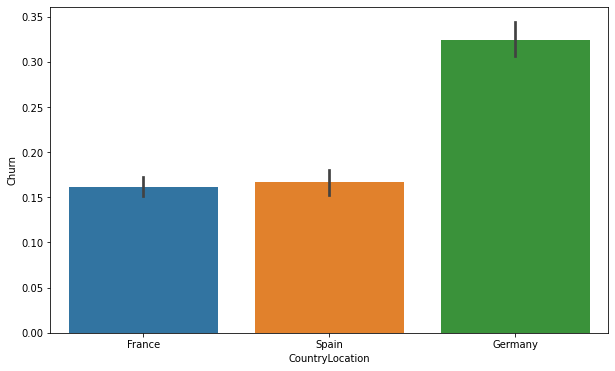

In [40]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="CountryLocation", y="Churn", data=df)
plt.show()

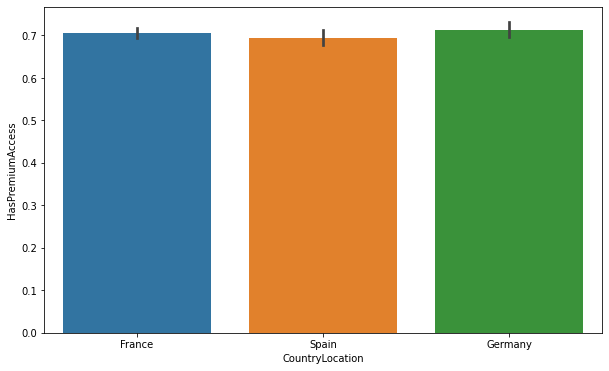

In [41]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="CountryLocation", y="HasPremiumAccess", data=df)
plt.show()

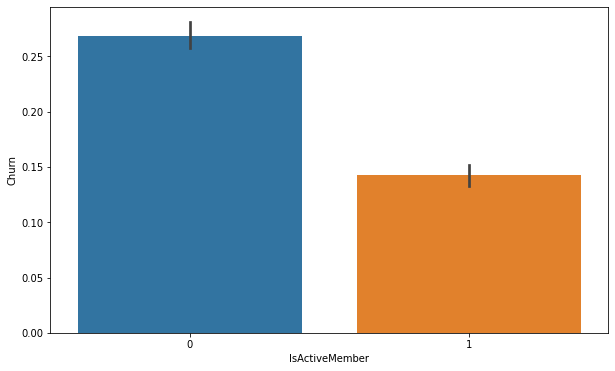

In [42]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="IsActiveMember", y="Churn", data=df)
plt.show()

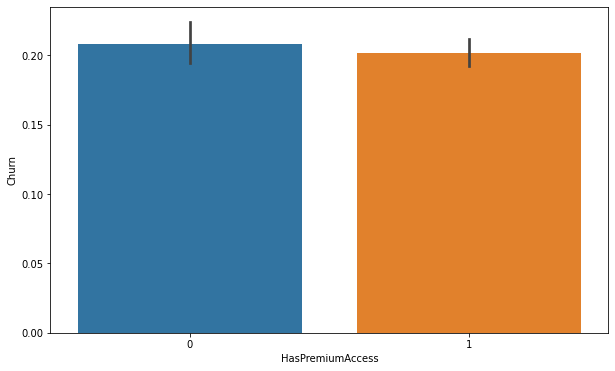

In [43]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="HasPremiumAccess", y="Churn", data=df)
plt.show()

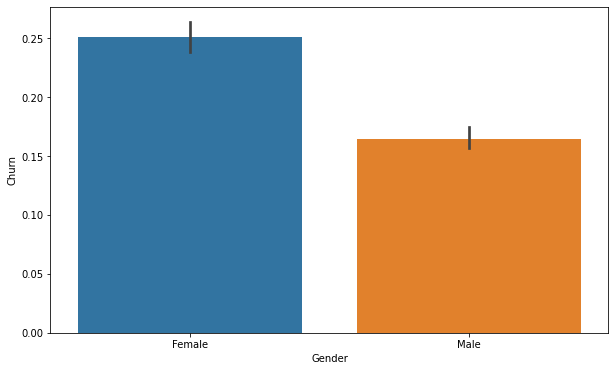

In [44]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Gender", y="Churn", data=df)
plt.show()

In [45]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

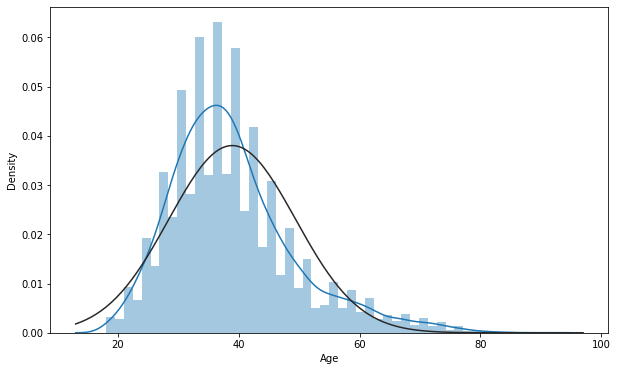

In [46]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(df['Age'], fit=norm)

In [47]:
# Trataremos las variables Tenure y Age
df['Edad'] = pd.cut(df['Age'],4,labels=['Adolescente','Adulto','Maduro','Anciano'])
df

,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,ScoreGroup,ScoreGroup_2,Edad
idClient,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,6.429719,Medio,GOLD,Adulto
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,6.411818,Medio,GOLD,Adulto
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,6.220590,Medio,SILVER,Adulto
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,6.551080,Medio,PLATINUM,Adulto
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,6.746412,Medio_alto,DIAMOND,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,6.648985,Medio_alto,DIAMOND,Adulto
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,6.248043,Medio,SILVER,Adolescente
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1,6.565265,Medio_alto,PLATINUM,Adolescente


In [48]:
pd.crosstab(df['Edad'],df['Tenure'],margins=True).apply(lambda r:(r/r.sum())*100,axis=0)

Tenure,0,1,2,3,4,5,6,7,8,9,10,All
Edad,,,,,,,,,,,,
Adolescente,22.033898,22.657005,22.709924,22.993062,24.368049,22.332016,23.009307,23.686770,24.536585,22.205285,21.632653,23.045
Adulto,24.092010,22.657005,23.425573,22.348860,22.295248,23.270751,23.474664,22.714008,21.804878,23.221545,24.897959,22.955
Maduro,3.510896,4.444444,3.387405,4.311199,3.185035,3.853755,2.998966,3.404669,3.414634,4.268293,2.653061,3.640
Anciano,0.363196,0.241546,0.477099,0.346878,0.151668,0.543478,0.517063,0.194553,0.243902,0.304878,0.816327,0.360
All,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000


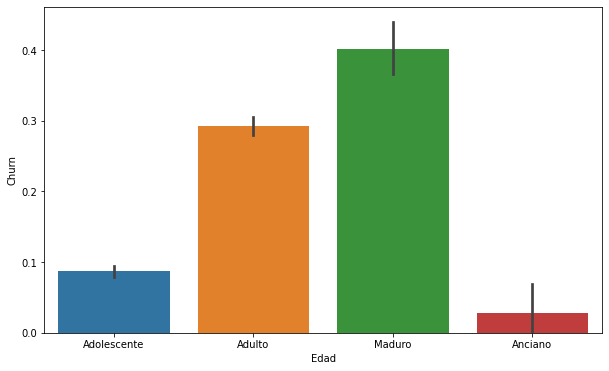

In [49]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Edad", y="Churn", data=df)
plt.show()

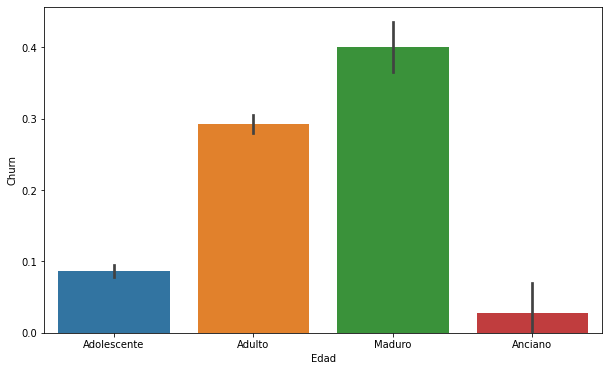

In [53]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Edad", y="Churn", data=df)
plt.show()

In [56]:
# Binarizamos male y female
df['Age_bin'] = df['Gender']
df = df.replace({'Age_bin': {'Male': 0, 'Female': 1}})
df

,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,ScoreGroup,ScoreGroup_2,Edad,Age_bin
idClient,,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,6.429719,Medio,GOLD,Adulto,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,6.411818,Medio,GOLD,Adulto,1
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,6.220590,Medio,SILVER,Adulto,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,6.551080,Medio,PLATINUM,Adulto,1
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,6.746412,Medio_alto,DIAMOND,Adulto,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,6.648985,Medio_alto,DIAMOND,Adulto,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,6.248043,Medio,SILVER,Adolescente,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1,6.565265,Medio_alto,PLATINUM,Adolescente,1


In [57]:
pd.crosstab(df['CountryLocation'], df['Age_bin'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)

Age_bin,0,1
CountryLocation,,
France,50.448965,49.768875
Germany,24.115815,26.260180
Spain,25.435221,23.970944


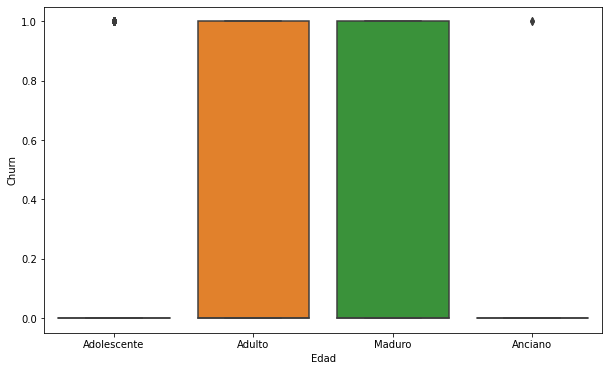

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Edad', y='Churn', data=df)
plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Score             10000 non-null  int64   
 1   CountryLocation   10000 non-null  object  
 2   Gender            10000 non-null  object  
 3   Age               10000 non-null  int64   
 4   Tenure            10000 non-null  int64   
 5   Games Balance     10000 non-null  float64 
 6   NumOfProducts     10000 non-null  int64   
 7   HasPremiumAccess  10000 non-null  int64   
 8   IsActiveMember    10000 non-null  int64   
 9   Cumulative score  10000 non-null  float64 
 10  Churn             10000 non-null  int64   
 11  score_norm        10000 non-null  float64 
 12  ScoreGroup        10000 non-null  category
 13  ScoreGroup_2      10000 non-null  category
 14  Edad              10000 non-null  category
 15  Age_bin           10000 non-null  int64   
dtypes: category(3), float6

In [60]:
df.dtypes

Score                  int64
CountryLocation       object
Gender                object
Age                    int64
Tenure                 int64
Games Balance        float64
NumOfProducts          int64
HasPremiumAccess       int64
IsActiveMember         int64
Cumulative score     float64
Churn                  int64
score_norm           float64
ScoreGroup          category
ScoreGroup_2        category
Edad                category
Age_bin                int64
dtype: object

In [61]:
# Para convertir en categóricas en binarias debemos pasarla primero en booleanas
# evaluando si son del tipo object o category
categorical_feature = (df.dtypes == "category") | (df.dtypes == object)

In [62]:
df.dtypes == "category"

Score               False
CountryLocation     False
Gender              False
Age                 False
Tenure              False
Games Balance       False
NumOfProducts       False
HasPremiumAccess    False
IsActiveMember      False
Cumulative score    False
Churn               False
score_norm          False
ScoreGroup           True
ScoreGroup_2         True
Edad                 True
Age_bin             False
dtype: bool

In [63]:
categorical_feature

Score               False
CountryLocation      True
Gender               True
Age                 False
Tenure              False
Games Balance       False
NumOfProducts       False
HasPremiumAccess    False
IsActiveMember      False
Cumulative score    False
Churn               False
score_norm          False
ScoreGroup           True
ScoreGroup_2         True
Edad                 True
Age_bin             False
dtype: bool

In [64]:
categorical_cols = df.columns[categorical_feature].tolist()
categorical_cols

['CountryLocation', 'Gender', 'ScoreGroup', 'ScoreGroup_2', 'Edad']

In [65]:
# Normalmente la tarea manual sería la siguiente:
cols = ['CountryLocation', 'Gender', 'ScoreGroup', 'ScoreGroup_2', 'Edad']

> Evitemos de añadir columnas a mano porque perdemos la escalabilidad y la personalización.

In [66]:
# Aplicamos la binarización con el método pd.get_dummies

,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,ScoreGroup,ScoreGroup_2,Edad,Age_bin
idClient,,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,6.429719,Medio,GOLD,Adulto,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,6.411818,Medio,GOLD,Adulto,1
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,6.220590,Medio,SILVER,Adulto,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,6.551080,Medio,PLATINUM,Adulto,1
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,6.746412,Medio_alto,DIAMOND,Adulto,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,6.648985,Medio_alto,DIAMOND,Adulto,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,6.248043,Medio,SILVER,Adolescente,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1,6.565265,Medio_alto,PLATINUM,Adolescente,1


In [69]:
# Aplicamos con get_dummies las variables categóricas binarizadas
df1 = pd.get_dummies(df, columns=categorical_cols)

In [70]:
df1

,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,Age_bin,CountryLocation_France,CountryLocation_Germany,CountryLocation_Spain,Gender_Female,Gender_Male,ScoreGroup_Muy_bajo,ScoreGroup_Bajo,ScoreGroup_Medio,ScoreGroup_Medio_alto,ScoreGroup_Alto,ScoreGroup_2_BRONCE,ScoreGroup_2_SILVER,ScoreGroup_2_GOLD,ScoreGroup_2_PLATINUM,ScoreGroup_2_DIAMOND,Edad_Adolescente,Edad_Adulto,Edad_Maduro,Edad_Anciano
idClient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,6.429719,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,6.411818,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,502,42,8,159660.80,3,1,0,113931.57,1,6.220590,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,6.551080,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,6.746412,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,6.648985,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
9997,516,35,10,57369.61,1,1,1,101699.77,0,6.248043,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9998,709,36,7,0.00,1,0,1,42085.58,1,6.565265,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


> Hay otra forma de binarizar las variables categóricas

In [71]:
categorical_cols

['CountryLocation', 'Gender', 'ScoreGroup', 'ScoreGroup_2', 'Edad']

In [72]:
churn_categorical = df[categorical_cols]
churn_categorical

,CountryLocation,Gender,ScoreGroup,ScoreGroup_2,Edad
idClient,,,,,
1,France,Female,Medio,GOLD,Adulto
2,Spain,Female,Medio,GOLD,Adulto
3,France,Female,Medio,SILVER,Adulto
4,France,Female,Medio,PLATINUM,Adulto
5,Spain,Female,Medio_alto,DIAMOND,Adulto
...,...,...,...,...,...
9996,France,Male,Medio_alto,DIAMOND,Adulto
9997,France,Male,Medio,SILVER,Adolescente
9998,France,Female,Medio_alto,PLATINUM,Adolescente


In [73]:
churn_categorical = pd.concat(
    [pd.get_dummies(churn_categorical[col], 
                    prefix=col) for col in churn_categorical], axis=1)

In [74]:
churn_categorical.head(2)

,CountryLocation_France,CountryLocation_Germany,CountryLocation_Spain,Gender_Female,Gender_Male,ScoreGroup_Muy_bajo,ScoreGroup_Bajo,ScoreGroup_Medio,ScoreGroup_Medio_alto,ScoreGroup_Alto,ScoreGroup_2_BRONCE,ScoreGroup_2_SILVER,ScoreGroup_2_GOLD,ScoreGroup_2_PLATINUM,ScoreGroup_2_DIAMOND,Edad_Adolescente,Edad_Adulto,Edad_Maduro,Edad_Anciano
idClient,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [76]:
train_churn = pd.concat([df[df.columns[~df.columns.isin(cols)]], churn_categorical], axis=1)
train_churn.head(3)

,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,Age_bin,CountryLocation_France,CountryLocation_Germany,CountryLocation_Spain,Gender_Female,Gender_Male,ScoreGroup_Muy_bajo,ScoreGroup_Bajo,ScoreGroup_Medio,ScoreGroup_Medio_alto,ScoreGroup_Alto,ScoreGroup_2_BRONCE,ScoreGroup_2_SILVER,ScoreGroup_2_GOLD,ScoreGroup_2_PLATINUM,ScoreGroup_2_DIAMOND,Edad_Adolescente,Edad_Adulto,Edad_Maduro,Edad_Anciano
idClient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,6.429719,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,6.411818,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,502,42,8,159660.80,3,1,0,113931.57,1,6.220590,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [77]:
train_churn

,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,Age_bin,CountryLocation_France,CountryLocation_Germany,CountryLocation_Spain,Gender_Female,Gender_Male,ScoreGroup_Muy_bajo,ScoreGroup_Bajo,ScoreGroup_Medio,ScoreGroup_Medio_alto,ScoreGroup_Alto,ScoreGroup_2_BRONCE,ScoreGroup_2_SILVER,ScoreGroup_2_GOLD,ScoreGroup_2_PLATINUM,ScoreGroup_2_DIAMOND,Edad_Adolescente,Edad_Adulto,Edad_Maduro,Edad_Anciano
idClient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,6.429719,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,6.411818,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,502,42,8,159660.80,3,1,0,113931.57,1,6.220590,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,6.551080,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,6.746412,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,6.648985,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
9997,516,35,10,57369.61,1,1,1,101699.77,0,6.248043,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9998,709,36,7,0.00,1,0,1,42085.58,1,6.565265,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [78]:
df.shape

(10000, 16)

In [79]:
df1.shape

(10000, 30)

## Correlación de las variables

### Método de correlación de Pearson

In [82]:
correlation_matrix = df.corr()
correlation_matrix

,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,Age_bin
Score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.995118,0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.004825,0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.000692,-0.014733
Games Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.005297,-0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.012914,0.021859
HasPremiumAccess,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005622,-0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.027196,-0.022544
Cumulative score,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.002832,0.008112
Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.030519,0.106512
score_norm,0.995118,-0.004825,0.000692,0.005297,0.012914,-0.005622,0.027196,-0.002832,-0.030519,1.000000,0.002613


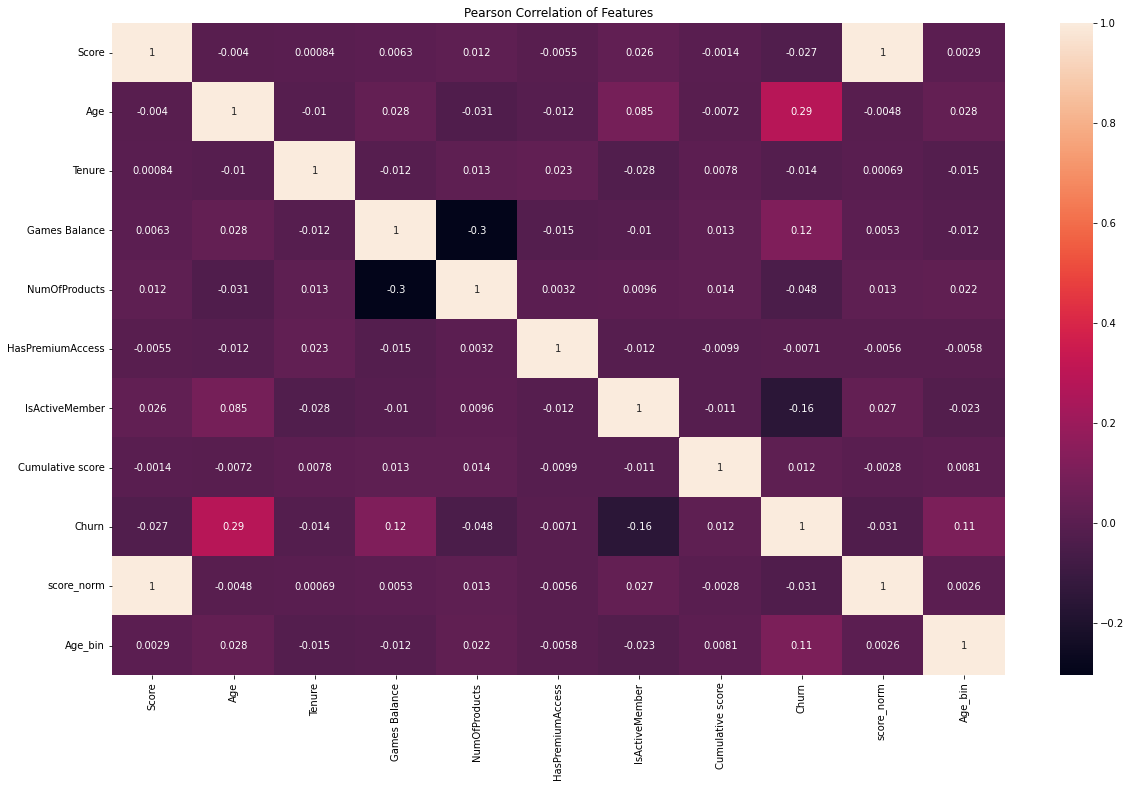

In [83]:
plt.figure(figsize=(20.0,12.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

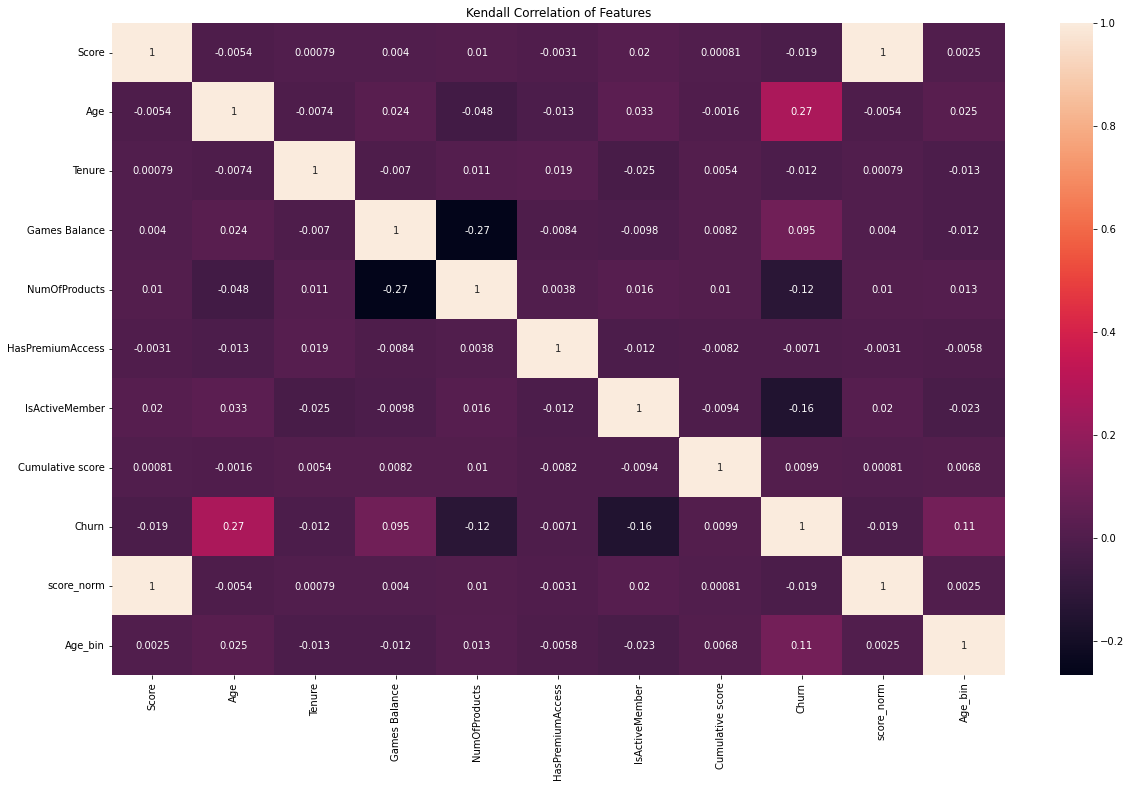

In [85]:
correlation_matrix = df.corr(method='kendall')
correlation_matrix
plt.figure(figsize=(20.0,12.0))
plt.title('Kendall Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

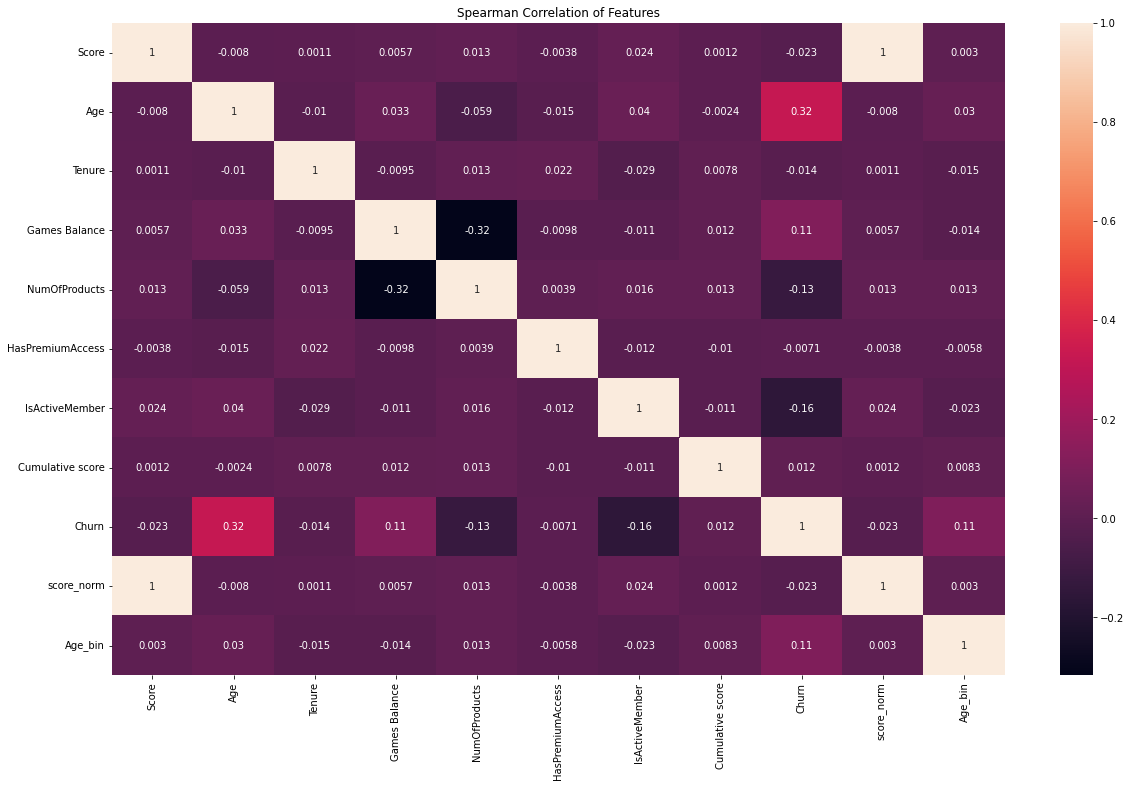

In [86]:
correlation_matrix = df.corr(method='spearman')
correlation_matrix
plt.figure(figsize=(20.0,12.0))
plt.title('Spearman Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

In [81]:
correlation_matrix = df1.corr()
correlation_matrix

,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,Age_bin,CountryLocation_France,CountryLocation_Germany,CountryLocation_Spain,Gender_Female,Gender_Male,ScoreGroup_Muy_bajo,ScoreGroup_Bajo,ScoreGroup_Medio,ScoreGroup_Medio_alto,ScoreGroup_Alto,ScoreGroup_2_BRONCE,ScoreGroup_2_SILVER,ScoreGroup_2_GOLD,ScoreGroup_2_PLATINUM,ScoreGroup_2_DIAMOND,Edad_Adolescente,Edad_Adulto,Edad_Maduro,Edad_Anciano
Score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.995118,0.002857,-0.008928,0.005538,0.004780,0.002857,-0.002857,NaN,-0.507121,-0.478454,0.768937,NaN,-0.323794,-0.584430,-0.332779,0.344430,0.659279,0.004938,-0.008097,0.002832,0.009912
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.004825,0.027544,-0.039208,0.046897,-0.001685,0.027544,-0.027544,NaN,0.000711,0.004568,-0.005154,NaN,0.022672,-0.004274,0.002376,-0.007415,0.002237,-0.733543,0.357822,0.619373,0.312477
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.000692,-0.014733,-0.002848,-0.000567,0.003868,-0.014733,0.014733,NaN,0.005606,-0.007773,0.005160,NaN,-0.004169,0.005792,0.000481,-0.005984,0.003166,0.003677,0.002167,-0.013085,0.005758
Games Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.005297,-0.012087,-0.231329,0.401110,-0.134892,-0.012087,0.012087,NaN,0.015778,-0.011426,0.003594,NaN,-0.009552,0.001350,-0.004411,-0.006029,0.015756,-0.035097,0.031146,0.010975,-0.010380
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.012914,0.021859,0.001230,-0.010419,0.009039,0.021859,-0.021859,NaN,-0.005550,-0.003542,0.006644,NaN,-0.006575,-0.013374,0.009808,-0.004387,0.008324,0.019077,-0.012127,-0.011902,-0.004422
HasPremiumAccess,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005622,-0.005766,0.002467,0.010577,-0.013480,-0.005766,0.005766,NaN,0.011952,-0.005900,-0.000160,NaN,0.010731,-0.007689,0.010048,-0.006712,-0.000832,0.015118,-0.016708,0.002868,0.000529
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.027196,-0.022544,0.003317,-0.020486,0.016732,-0.022544,0.022544,NaN,-0.024643,-0.000718,0.013803,NaN,-0.018153,-0.012352,-0.005556,0.016054,0.004844,-0.008870,-0.062166,0.114758,0.066059
Cumulative score,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.002832,0.008112,-0.003332,0.010297,-0.006482,0.008112,-0.008112,NaN,0.016410,-0.010158,0.001933,NaN,0.001742,0.004699,-0.010615,0.004954,0.002065,-0.002969,0.013805,-0.018591,-0.006731
Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.030519,0.106512,-0.104955,0.173488,-0.052667,0.106512,-0.106512,NaN,0.021279,-0.002713,-0.008432,NaN,0.041027,0.010847,0.007136,-0.020256,-0.008479,-0.268410,0.203196,0.137338,-0.037198
score_norm,0.995118,-0.004825,0.000692,0.005297,0.012914,-0.005622,0.027196,-0.002832,-0.030519,1.000000,0.002613,-0.009435,0.004067,0.006844,0.002613,-0.002613,NaN,-0.564086,-0.414152,0.731860,NaN,-0.376575,-0.610269,-0.287090,0.373470,0.607179,0.004523,-0.007234,0.001791,0.010464


## Estudio de las variables o atributos

In [91]:
# Mostrar las 5 features con mejor coeficiente de correlación
corr = df.corr()
print(corr['Churn'].sort_values(ascending=False)[:6], '\n')
print(corr['Churn'].sort_values(ascending=False)[-6:])

Churn               1.000000
Age                 0.285323
Games Balance       0.118533
Age_bin             0.106512
Cumulative score    0.012097
HasPremiumAccess   -0.007138
Name: Churn, dtype: float64 

HasPremiumAccess   -0.007138
Tenure             -0.014001
Score              -0.027094
score_norm         -0.030519
NumOfProducts      -0.047820
IsActiveMember     -0.156128
Name: Churn, dtype: float64


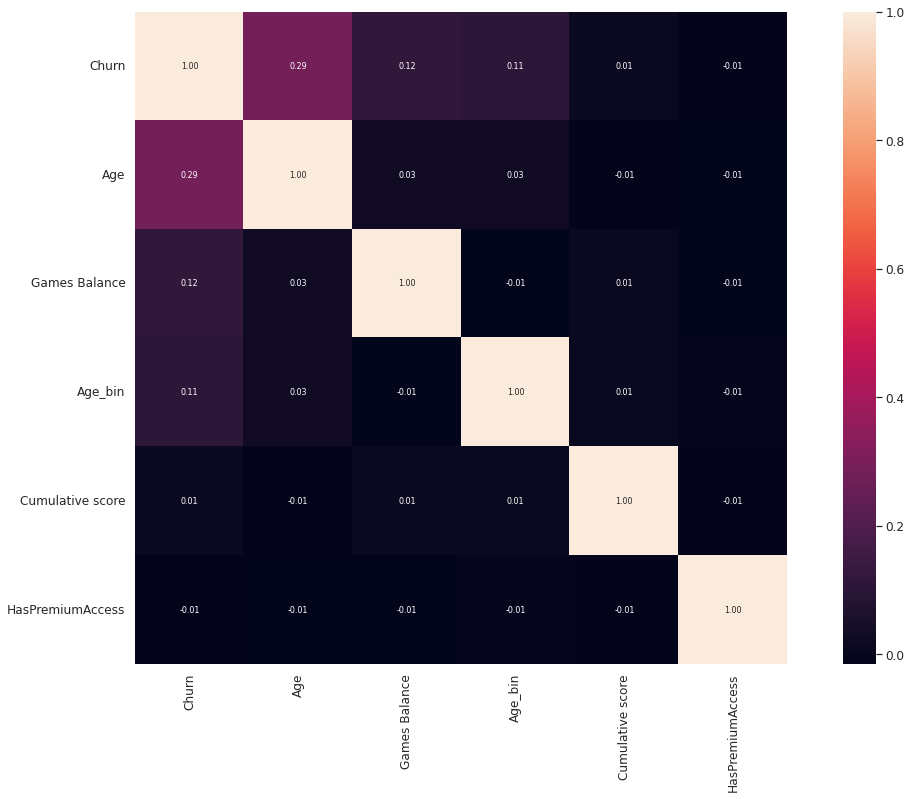

In [96]:
# Crear la matriz de correlación
k = 6
plt.figure(figsize=(20,12))
corrmat = df.corr()
cols5 = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(df[cols5].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols5.values, xticklabels=cols5.values)
plt.show()

In [95]:
cols5

Index(['Churn', 'Age', 'Games Balance', 'Age_bin', 'Cumulative score'], dtype='object')

> Eliminamos las columnas que no harán parte del modelo

In [97]:
train_churn

,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,Age_bin,CountryLocation_France,CountryLocation_Germany,CountryLocation_Spain,Gender_Female,Gender_Male,ScoreGroup_Muy_bajo,ScoreGroup_Bajo,ScoreGroup_Medio,ScoreGroup_Medio_alto,ScoreGroup_Alto,ScoreGroup_2_BRONCE,ScoreGroup_2_SILVER,ScoreGroup_2_GOLD,ScoreGroup_2_PLATINUM,ScoreGroup_2_DIAMOND,Edad_Adolescente,Edad_Adulto,Edad_Maduro,Edad_Anciano
idClient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,6.429719,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,6.411818,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,502,42,8,159660.80,3,1,0,113931.57,1,6.220590,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,6.551080,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,6.746412,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,6.648985,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
9997,516,35,10,57369.61,1,1,1,101699.77,0,6.248043,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9998,709,36,7,0.00,1,0,1,42085.58,1,6.565265,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [103]:
model_cols = ['Age', 'Games Balance', 'Cumulative score', 'HasPremiumAccess', 'Churn']
model_df = df[model_cols]

In [104]:
model_df

,Age,Games Balance,Cumulative score,HasPremiumAccess,Churn
idClient,,,,,
1,42,0.00,101348.88,1,1
2,41,83807.86,112542.58,0,0
3,42,159660.80,113931.57,1,1
4,39,0.00,93826.63,0,0
5,43,125510.82,79084.10,1,0
...,...,...,...,...,...
9996,39,0.00,96270.64,1,0
9997,35,57369.61,101699.77,1,0
9998,36,0.00,42085.58,0,1


In [106]:
# Realizamos el train_test_split 80-20
X = model_df.drop('Churn', axis=1)
y = model_df['Churn']

In [163]:
X

,Age,Games Balance,Cumulative score,HasPremiumAccess
idClient,,,,
1,42,0.00,101348.88,1
2,41,83807.86,112542.58,0
3,42,159660.80,113931.57,1
4,39,0.00,93826.63,0
5,43,125510.82,79084.10,1
...,...,...,...,...
9996,39,0.00,96270.64,1
9997,35,57369.61,101699.77,1
9998,36,0.00,42085.58,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=13)

In [108]:
X_train.shape

(8000, 4)

In [109]:
X_test.shape

(2000, 4)

In [110]:
X_train.head()

,Age,Games Balance,Cumulative score,HasPremiumAccess
idClient,,,,
3400,31,175443.75,113167.17,1
4493,32,127763.24,100717.54,1
8725,30,0.00,138465.70,1
886,25,0.00,157878.67,1
5854,40,62389.03,148623.43,1


## Data Normalization

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

In [116]:
# Data Standardization
standardization_x = normalize(df[['Age','Games Balance','Cumulative score']],)
standardization_x

array([[4.14410069e-04, 0.00000000e+00, 9.99999914e-01],
       [2.92190105e-04, 5.97264084e-01, 8.02044593e-01],
       [2.14129768e-04, 8.14003097e-01, 5.80860492e-01],
       ...,
       [8.55399565e-04, 0.00000000e+00, 9.99999634e-01],
       [3.51657415e-04, 6.28590225e-01, 7.77736591e-01],
       [2.06442962e-04, 9.59537966e-01, 2.81579205e-01]])

In [130]:
from sklearn import preprocessing
cols_to_standarize = ['Age','Games Balance','Cumulative score']
for col in cols_to_standarize:
  X_train[col] = preprocessing.scale(X_train[col], axis=0, copy=False)

In [131]:
X_train.head()

,Age,Games Balance,Cumulative score,HasPremiumAccess
idClient,,,,
3400,-0.763706,1.576980,0.231253,1
4493,-0.668719,0.812502,0.014937,1
8725,-0.858693,-1.235970,0.670825,1
886,-1.333627,-1.235970,1.008132,1
5854,0.091175,-0.235665,0.847319,1


In [164]:
cols_to_standarize = ['Age','Games Balance','Cumulative score']
for col in cols_to_standarize:
  X_test[col] = preprocessing.scale(X_test[col], axis=0, copy=False)

***

¡Tened en cuenta esto!


In [149]:
temporal = model_df['Churn'].value_counts()
targetDF = pd.DataFrame({
    'Target': temporal.index,
    'Recuento': temporal.values
})
targetDF.head()

,Target,Recuento
0,0,7963
1,1,2037


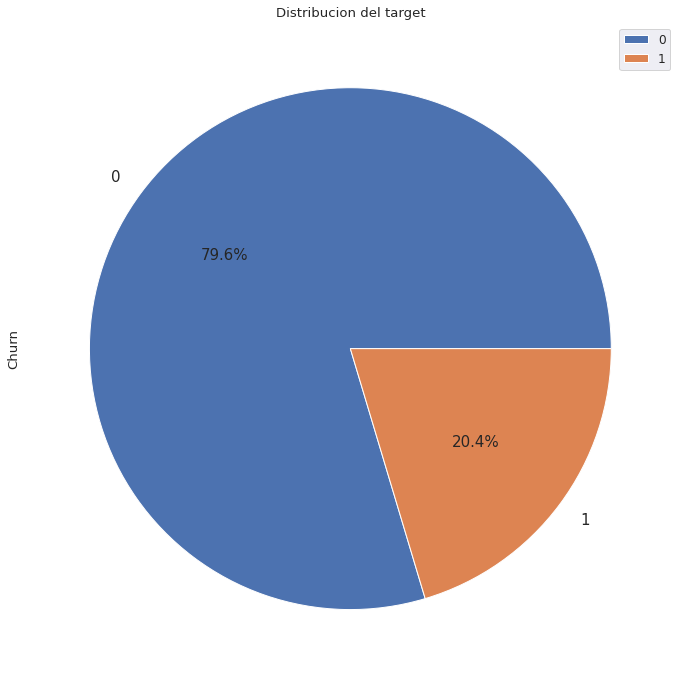

In [146]:
temporal.plot.pie(figsize=(20,12),
            title='Distribucion del target',
            fontsize=15,
            legend=True,
            autopct=lambda v: "{:0.1f}%".format(v)
)

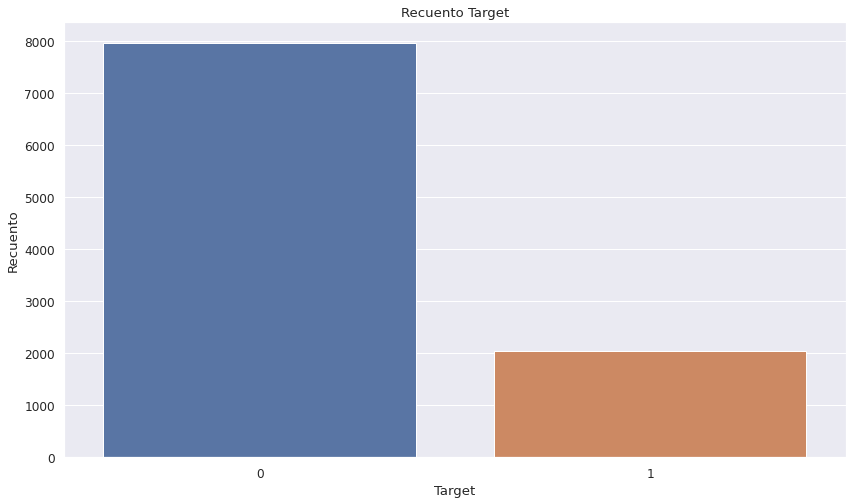

In [153]:
histog = pd.DataFrame({'Target': temporal.index,
                   'Recuento': temporal.values
                  })
plt.figure(figsize = (14,8))
plt.title('Recuento Target')
sns.set_color_codes("pastel")
sns.barplot(x = 'Target', y="Recuento", data=histog)
locs, labels = plt.xticks()
plt.show()

## Modeling

We have prepared our dataset and ready for to apply algorithms to predict variable Churn:

    Logistic Regression: 77.96%
    Decision Tree: 72.6%
    Random Forests: 78.3%
    k-nearest neigbours: 78.41%
    Support Vector Machines: 79.99%
